In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Display all the columns of the dataframe
pd.pandas.set_option("display.max_columns", None)

In [2]:
data = pd.read_csv("data.csv")

# print shape of dataset with rows and columns
print(data.shape)

(4238, 16)


In [3]:
# print the top5 records
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### Exploratory Data Analysis

#### Missing Values

In [5]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
# Here we will check the percentage of nan values in each features.

features_with_na = [feature for feature in data.columns if data[feature].isnull().sum() > 1]

for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(),4), "% missing values" )

education 0.0248 % missing values
cigsPerDay 0.0068 % missing values
BPMeds 0.0125 % missing values
totChol 0.0118 % missing values
BMI 0.0045 % missing values
glucose 0.0916 % missing values


#### Numerical Variables

In [7]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != "O"]
print("Number of numerical features: ", len(numerical_features))


# visualise the numerical variable
data[numerical_features].head()

Number of numerical features:  16


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


There are no categorical features in dataset.

In [8]:
# Numerical variables are usually of 2 type
# Continous variable and Discrete Variables

discrete_features = [feature for feature in numerical_features if len(data[feature].unique()) < 25]

print("Discrete variable count: ", len(discrete_features))

Discrete variable count:  8


In [9]:
discrete_features

['male',
 'education',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [10]:
data[discrete_features].head()

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,1,4.0,0,0.0,0,0,0,0
1,0,2.0,0,0.0,0,0,0,0
2,1,1.0,1,0.0,0,0,0,0
3,0,3.0,1,0.0,0,1,0,1
4,0,3.0,1,0.0,0,0,0,0


#### Continuous Variable

In [11]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print("Continuous features count: ", len(continuous_features))

Continuous features count:  8


In [12]:
data[continuous_features].head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0


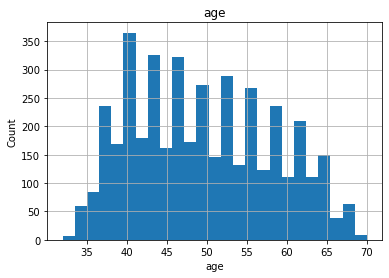

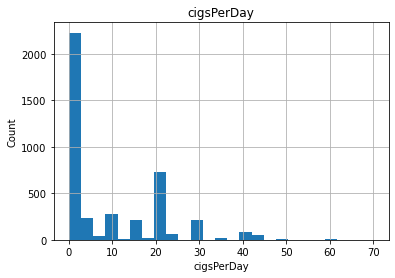

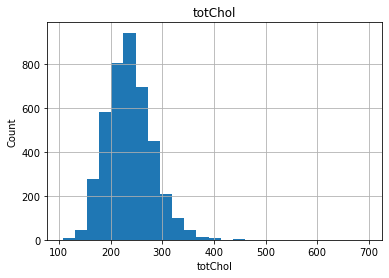

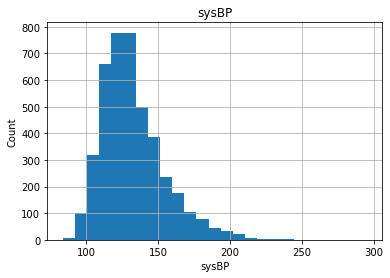

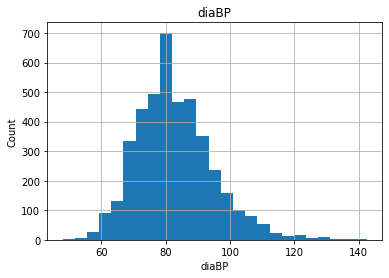

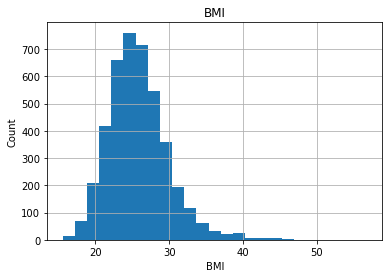

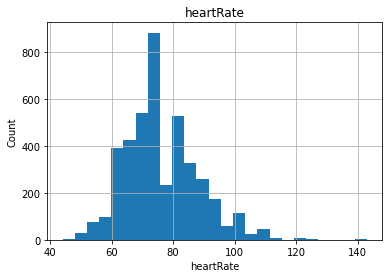

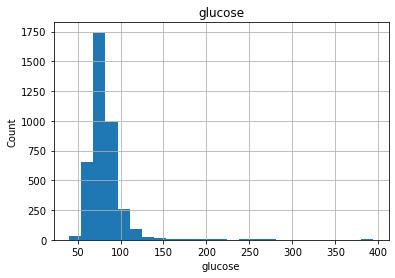

In [13]:
# Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continuous_features:
    data1 = data.copy()
    data1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### Outliers

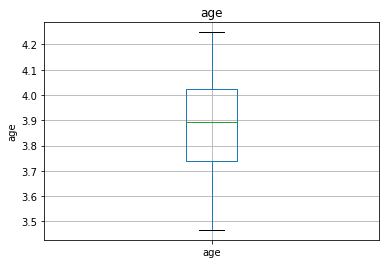

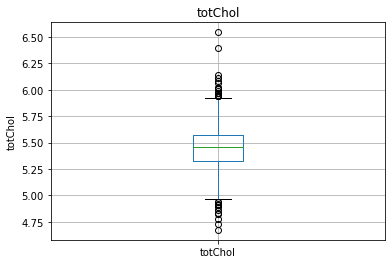

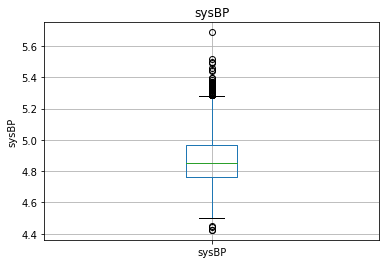

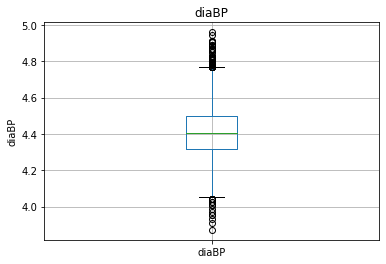

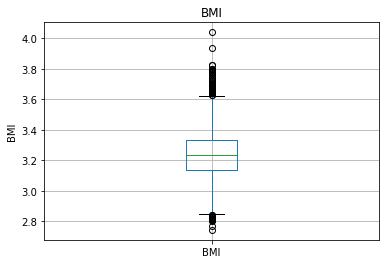

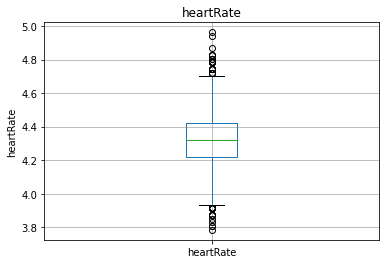

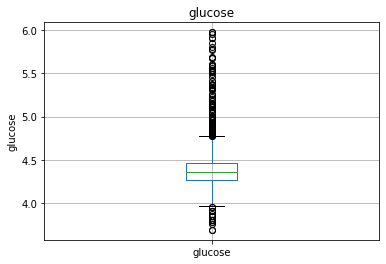

In [14]:
for feature in continuous_features:
    data1 = data.copy()
    if 0 in data1[feature].unique():
        pass
    else:
        data1[feature] = np.log(data1[feature])
        data1.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Feature Engineering

In [15]:
# Replacing the numerical Missing Values
for feature in features_with_na:
    median_value = data[feature].median()
    
    
    # create a new feature to capture nan values
    data[feature+"_nan"] = np.where(data[feature].isnull(),1,0)
    data[feature].fillna(median_value, inplace=True)
    
data[numerical_features].isnull().sum()
    

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose            0
TenYearCHD         0
dtype: int64

In [16]:
median_value = data["heartRate"].median()
data["heartRate"].fillna(median_value, inplace=True)

In [17]:
data[numerical_features].isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [18]:
for feature in continuous_features:
    data1 = data.copy()
    if 0 in data1[feature].unique():
        pass
    else:
        data1[feature] = np.log(data1[feature])

In [19]:
data.head(50)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_nan,cigsPerDay_nan,BPMeds_nan,totChol_nan,BMI_nan,glucose_nan
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0,0,0,0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,0,0,0,0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,0,0,0,0,0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,0,0,0,0,0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,0,0,0,0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0,0,0,0,0,0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1,0,0,0,0,0,0
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0,0,0,0,0,0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0,0,0,0,0,0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0,0,0,0,0,0,0


### Splitting the dataset into the Training set and Test set

In [20]:
X = data.drop("TenYearCHD", axis=1)
y = data["TenYearCHD"]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)

### Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1072   12]
 [ 166   22]]
0.860062893081761
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1084
           1       0.65      0.12      0.20       188

    accuracy                           0.86      1272
   macro avg       0.76      0.55      0.56      1272
weighted avg       0.83      0.86      0.82      1272

